In [17]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms.community.centrality import girvan_newman

from modularity_maximization import partition
from modularity_maximization.utils import get_modularity

# import data
df = pd.read_csv('../dataset/edge_mean_th95.csv', index_col =0, dtype='int64')

In [19]:
dataset = '../dataset/edge_mean_th95.csv'

# import data
df = pd.read_csv(dataset, index_col =0, dtype='int64')

# define edge_list (u,v)
edge_list = list(df.itertuples(index=False, name=None))

# define node_list
node_list = [x for x in range(max(df['dst']))]

# Create Graph 
G = nx.Graph()

# Add node and edge to graph
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)

# Delete node which does not have neighborhood
print('Delete node with no neighborhood: {} \n'.format(list(nx.isolates(G))))
G.remove_nodes_from(list(nx.isolates(G)))
print('Number of node:',len(G.nodes))

In [23]:
# criterion for most valuable edge (can be changed)
def most_central_edge(G):
    centrality = betweenness(G, weight="weight")
    # print(centrality)
    return max(centrality, key=centrality.get)

# Eigenvector 
Partition 자체가 Modularity Matrix에 대한 Eigenvector

In [24]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 91\nNumber of edges: 169\nAverage degree:   3.7143'

In [25]:
comm_dict = partition(G)

In [27]:
for comm in set(comm_dict.values()):
    print("Community %d"%comm)
    print(', '.join([str(node) for node in comm_dict if comm_dict[node] == comm]))

Community 4
5, 28, 32, 40, 43, 50, 62, 66, 67, 69, 86, 100, 111, 123, 127, 132, 137
Community 7
9, 22, 26, 29, 33, 41, 91, 122, 126, 130
Community 11
0, 6, 8, 30, 36, 37, 46, 58, 75, 94, 102, 110, 119, 136, 141
Community 12
39, 48, 54, 55, 56, 76, 82, 95, 125
Community 14
4, 15, 114, 121
Community 15
83, 96, 115
Community 16
7, 13, 35, 38, 70, 78, 90, 98, 120, 135
Community 17
1, 2, 34, 42, 45, 59, 85, 97
Community 18
17, 68, 106, 108, 118, 139
Community 20
10, 11, 23, 134
Community 21
20, 129
Community 22
3, 19, 89


In [28]:
print('Modularity of such partition for karate is %.3f' % get_modularity(G, comm_dict))

Calculating modularity for undirected graph
Modularity of such partition for karate is 0.641


# Modularity Maximization with Greedy Algorithm

In [29]:
from networkx.algorithms.community import greedy_modularity_communities

In [30]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 91\nNumber of edges: 169\nAverage degree:   3.7143'

In [37]:
# greedy_modularity_communities(G)

[frozenset({0,
            6,
            8,
            30,
            36,
            37,
            39,
            46,
            48,
            54,
            55,
            56,
            58,
            75,
            76,
            82,
            94,
            95,
            102,
            110,
            119,
            125,
            136,
            141}),
 frozenset({5,
            28,
            32,
            40,
            43,
            50,
            62,
            66,
            67,
            69,
            86,
            100,
            111,
            123,
            127,
            132,
            137}),
 frozenset({4, 7, 13, 15, 35, 38, 70, 78, 90, 98, 114, 120, 121, 135}),
 frozenset({9, 22, 26, 29, 33, 41, 91, 122, 126, 130}),
 frozenset({1, 2, 34, 42, 45, 59, 85, 97}),
 frozenset({17, 68, 106, 108, 118, 139}),
 frozenset({10, 11, 23, 134}),
 frozenset({3, 19, 89}),
 frozenset({83, 96, 115}),
 frozenset({20, 129})]

In [38]:
greedy_module_comms = nx.algorithms.community.greedy_modularity_communities(G)

In [43]:
greedy_dict = {}

for i, value in enumerate(greedy_module_comms):
    values = list(value)
    for v in values:
        greedy_dict[v] = i

In [52]:
for comm in set(greedy_dict.values()):
    print("Community %d"%comm)
    print(comm)
    print(', '.join([str(node) for node in greedy_dict if greedy_dict[node] == comm]))

Community 0
0
0, 6, 8, 136, 141, 30, 36, 37, 39, 46, 48, 54, 55, 56, 58, 75, 76, 82, 94, 95, 102, 110, 119, 125
Community 1
1
32, 66, 67, 100, 5, 132, 69, 40, 137, 43, 111, 50, 86, 123, 28, 62, 127
Community 2
2
98, 35, 4, 70, 7, 135, 38, 13, 78, 15, 114, 120, 121, 90
Community 3
3
33, 130, 26, 41, 9, 22, 122, 91, 29, 126
Community 4
4
1, 2, 34, 97, 42, 45, 85, 59
Community 5
5
68, 106, 139, 108, 17, 118
Community 6
6
10, 11, 134, 23
Community 7
7
19, 89, 3
Community 8
8
96, 83, 115
Community 9
9
129, 20


In [53]:
print('Modularity of such partition for karate is %.3f' % get_modularity(G, greedy_dict))

Calculating modularity for undirected graph
Modularity of such partition for karate is 0.627


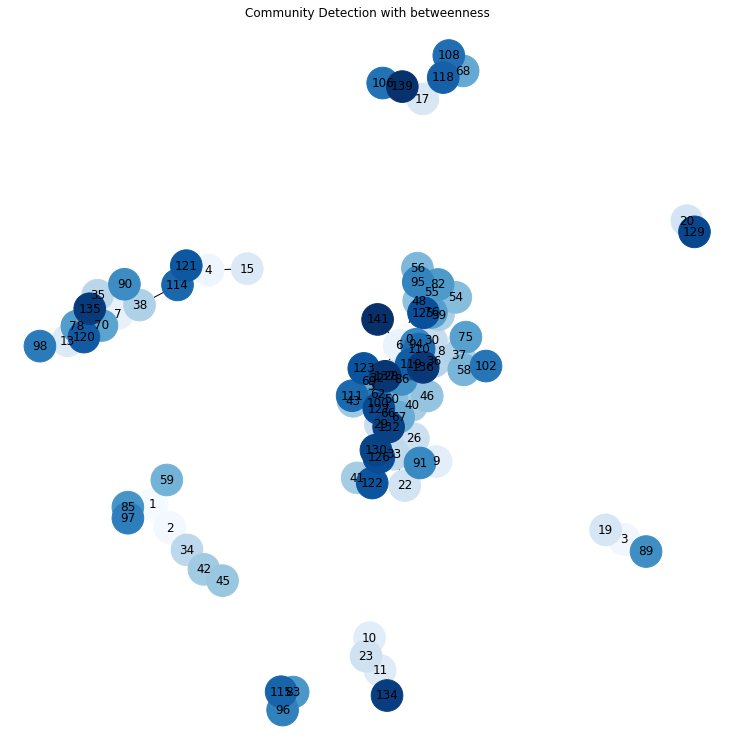

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, scale=4)
nx.draw(G, pos, node_color=range(len(G.nodes)), node_size=1000, with_labels=True, cmap=plt.cm.Blues)
plt.title('Community Detection with betweenness')
plt.show()
plt.savefig('betweenness.jpg')

# Performance Metric

In [102]:
edge_mean_th95 = '../dataset/edge_mean_th95.csv' 
edge_mean_top5 = '../dataset/edge_mean_top5.csv'
edge_mice_th95 = '../dataset/edge_mice_th95.csv'
edge_mice_top5 = '../dataset/edge_mice_top5.csv'
edge_grape_th90 = '../dataset/edge_GRAPE_th90.csv'
edge_grape_top5 = '../dataset/edge_GRAPE_top5.csv'
edge_original_th90 = '../dataset/edge_Original_th90.csv'
edge_original_top5 = '../dataset/edge_Original_top5.csv'

incomplete = '../dataset/incomplete.csv'

In [105]:
datalist = [edge_original_th90, edge_original_top5, edge_mean_th95, edge_mean_top5, edge_mice_th95, edge_mice_top5, edge_grape_th90, edge_grape_top5]

In [137]:
def modularity_calculation(dataset):
    print('='*50)
    print(f'[[Dataset: {dataset.split("/")[-1]}]]')
    # import data
    df = pd.read_csv(dataset, index_col =0, dtype='int64')

    # define edge_list (u,v)
    edge_list = list(df.itertuples(index=False, name=None))

    # define node_list
    node_list = [x for x in range(max(df['dst']))]

    # Create Graph 
    G = nx.Graph()

    # Add node and edge to graph
    G.add_nodes_from(node_list)
    G.add_edges_from(edge_list)

#     # Delete node which does not have neighborhood
#     print('Delete node with no neighborhood: {} \n'.format(list(nx.isolates(G))))
#     G.remove_nodes_from(list(nx.isolates(G)))
#     print('Number of node:',len(G.nodes))
    
    print('{Partition > Eigenvector based clustering}')
    comm_dict = partition(G)

#     for comm in set(comm_dict.values()):
#         print("Community %d"%comm)
#         print(', '.join([str(node) for node in comm_dict if comm_dict[node] == comm]))
        
    print(f': Modularity of such partition for {dataset.split("/")[-1]} is \033[1m %.3f \033[0m' % get_modularity(G, comm_dict))
    print()
    print('-'*20)
    print()
    print('{Modularity Maximization}')
    
    greedy_module_comms = nx.algorithms.community.greedy_modularity_communities(G)
    greedy_dict = {}

    for i, value in enumerate(greedy_module_comms):
        values = list(value)
        for v in values:
            greedy_dict[v] = i

#     for comm in set(greedy_dict.values()):
#         print("Community %d"%comm)
#         print(comm)
#         print(', '.join([str(node) for node in greedy_dict if greedy_dict[node] == comm]))
    
    print(f': Modularity of such partition for {dataset.split("/")[-1]} is \033[1m %.3f \033[0m' % get_modularity(G, greedy_dict))
    print()
    print('-'*20)
    print()
    print('{Betweenness}')
    
    communities = girvan_newman(G, most_valuable_edge=most_central_edge)

    node_groups = []
    for com in next(communities):
        node_groups.append(list(com))

    central_dict = {}
    for i, value in enumerate(node_groups):
        for v in value:
            central_dict[v] = i
    
    print(f': Modularity of such partition for {dataset.split("/")[-1]} is \033[1m %.3f \033[0m' % get_modularity(G, central_dict))
    print()

In [138]:
for data in datalist:
    modularity_calculation(data)

[[Dataset: edge_Original_th90.csv]]
{Partition > Eigenvector based clustering}
Calculating modularity for undirected graph
: Modularity of such partition for edge_Original_th90.csv is  0.625 

--------------------

{Modularity Maximization}
Calculating modularity for undirected graph
: Modularity of such partition for edge_Original_th90.csv is  0.603 

--------------------

{Betweenness}
Calculating modularity for undirected graph
: Modularity of such partition for edge_Original_th90.csv is  0.576 

[[Dataset: edge_Original_top5.csv]]
{Partition > Eigenvector based clustering}
Calculating modularity for undirected graph
: Modularity of such partition for edge_Original_top5.csv is  0.757 

--------------------

{Modularity Maximization}
Calculating modularity for undirected graph
: Modularity of such partition for edge_Original_top5.csv is  0.738 

--------------------

{Betweenness}
Calculating modularity for undirected graph
: Modularity of such partition for edge_Original_top5.csv is

In [127]:
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms.community.centrality import girvan_newman

# criterion for most valuable edge (can be changed)
def most_central_edge(G):
    centrality = betweenness(G, weight="weight")
    # print(centrality)
    return max(centrality, key=centrality.get)

In [129]:
communities = girvan_newman(G, most_valuable_edge=most_central_edge)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))
    
central_dict = {}
for i, value in enumerate(node_groups):
    for v in value:
        central_dict[v] = i

Calculating modularity for undirected graph


0.5125170687300865